In [1]:
import os
import pandas as pd
from pathlib import Path
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In this notebook, we plot the average outputs of 20 different trainings on the dataset.

In [2]:
def process_txt_files_to_dataframe(root_folder, word):
    """
    Process all .txt files in subfolders into a pandas DataFrame.
    
    Args:
        root_folder (str): Path to the root folder containing subfolders with .txt files
    
    Returns:
        pd.DataFrame: Combined dataframe from all processed .txt files
    """
    all_data = []
    
    # Walk through all subfolders
    for foldername, subfolders, filenames in os.walk(root_folder):
        for filename in filenames:
            if filename.lower().endswith('.txt') and  word in filename.lower():
                print(f"Processing file: {filename} in folder: {foldername}")
                # Construct full file path
                filepath = Path(foldername) / filename
                
                # Read the file
                with open(filepath, 'r') as file:
                    lines = file.readlines()
                
                if len(lines) < 1:
                    continue  # Skip empty files
                
                # Get header (first line)
                header = lines[0].strip().split()
                
                # Process data lines
                data_lines = [line.strip().split() for line in lines[1:] if line.strip()]
                
                # Create DataFrame for this file
                df = pd.DataFrame(data_lines, columns=header)
                
                all_data.append(df)
    
    # Combine all DataFrames
    if all_data:
        combined_df = pd.concat(all_data, ignore_index=True)
        return combined_df
    else:
        return pd.DataFrame()  # Return empty DataFrame if no files found

In [3]:
#Transformer data collection
root_folder = './Transformer'  # Use current directory, or replace with your folder path
df_trans_up = process_txt_files_to_dataframe(root_folder, '_upsampling')
df_trans_doup = process_txt_files_to_dataframe(root_folder, '_doupsampling')
df_trans = process_txt_files_to_dataframe(root_folder, 'nodevice_segmented')
# Display the result
print(df_trans_up.head())
print(df_trans_doup.head())
df_trans.head()

Processing file: transformer_nodevice_upsampling_segmented_sorted.txt in folder: ./Transformer
Processing file: transformer_nodevice_doupsampling_segmented_sorted.txt in folder: ./Transformer
Processing file: transformer_nodevice_segmented_sorted.txt in folder: ./Transformer
  batch_size transformermodel upsample     lr max_length_series  \
0        128           trans1   ADASYN  0.001              4000   
1        128           trans1   ADASYN  0.001              4000   
2        128           trans1    SMOTE  0.001              4000   
3        128           trans1    SMOTE  0.001              4000   
4        128           trans1    SMOTE  0.001              4000   

  segment_duration nhead_encoder conv1d_kernel_size bool_conv1d_emb  \
0               50            16                  7            True   
1               50            16                  7            True   
2               50            16                  7           False   
3               50            16     

,batch_size,transformermodel,lr,max_length_series,segment_duration,nhead_encoder,conv1d_kernel_size,bool_conv1d_emb,embed_size,dim_feedforward,...,mean_f1_score,mean_gmean,mean_precision,mean_recall,std_accuracy,std_f1_score,std_gmean,std_precision,std_recall,total_params
0,128,trans1,0.001,4000,50,16,7,True,64,16,...,0.9498,0.9688,0.9495,0.9504,0.0065,0.0065,0.0039,0.0064,0.0065,186534
1,128,trans1,0.001,4000,50,16,7,True,64,16,...,0.9494,0.9684,0.9490,0.9506,0.0062,0.0066,0.0040,0.0064,0.0064,148486
2,128,trans1,0.001,4000,50,16,7,False,64,16,...,0.9490,0.9684,0.9488,0.9499,0.0080,0.0076,0.0049,0.0078,0.0071,186534
3,128,trans1,0.001,4000,50,16,7,False,64,16,...,0.9455,0.9664,0.9457,0.9458,0.0061,0.0061,0.0036,0.0059,0.0060,148486


In [4]:
#CNN data collection
root_folder = './CNN'  # Use current directory, or replace with your folder path
df_cnn_up = process_txt_files_to_dataframe(root_folder, '_upsampling')
df_cnn_doup = process_txt_files_to_dataframe(root_folder, '_doupsampling')
df_cnn = process_txt_files_to_dataframe(root_folder, 'nodevice_segmented')
# Display the result
print(df_cnn_up.head())
print(df_cnn_doup.head())
df_cnn.head()

Processing file: cnnlstm_nodevice_upsampling_segmented_sorted.txt in folder: ./CNN
Processing file: cnnlstm_nodevice_doupsampling_segmented_sorted.txt in folder: ./CNN
Processing file: cnnlstm_nodevice_segmented_sorted.txt in folder: ./CNN
  batch_size    model_type upsample     lr max_length_series segment_duration  \
0        128          cnn1   ADASYN  0.001              4000              100   
1        128          cnn1    SMOTE  0.001              4000              100   
2        128  cnnbatchnorm    SMOTE  0.001              4000              100   
3        128          cnn1   ADASYN  0.001              4000              100   
4        128          cnn1   ADASYN  0.001              4000              100   

  num_conv_lyrs size_linear_lyr num_blocks_per_layer initial_channels  ...  \
0             6              32                    2                8  ...   
1             6              32                    2                8  ...   
2             6              16        

,batch_size,model_type,lr,max_length_series,segment_duration,num_conv_lyrs,size_linear_lyr,num_blocks_per_layer,initial_channels,lstm_hidden_size,...,mean_f1_score,mean_gmean,mean_precision,mean_recall,std_accuracy,std_f1_score,std_gmean,std_precision,std_recall,total_params
0,128,cnn1,0.001,4000,100,6,32,4,8,0,...,0.9280,0.9556,0.9298,0.9276,0.0133,0.0119,0.0076,0.0118,0.0115,139942
1,128,cnn1,0.001,4000,50,6,32,2,8,0,...,0.9280,0.9556,0.9298,0.9276,0.0133,0.0119,0.0076,0.0118,0.0115,139942
2,128,cnn1,0.001,4000,50,6,32,2,8,0,...,0.9280,0.9556,0.9298,0.9276,0.0133,0.0119,0.0076,0.0118,0.0115,139942
3,128,cnn1,0.001,4000,50,6,32,4,8,0,...,0.9280,0.9556,0.9298,0.9276,0.0133,0.0119,0.0076,0.0118,0.0115,139942
4,128,cnn1,0.001,4000,50,6,32,4,8,0,...,0.9280,0.9556,0.9298,0.9276,0.0133,0.0119,0.0076,0.0118,0.0115,139942


In [5]:
#CNN_LSTM data collection
root_folder = './CNN_LSTM'  # Use current directory, or replace with your folder path
df_cnnlstm_up = process_txt_files_to_dataframe(root_folder, '_upsampling')
df_cnnlstm_doup = process_txt_files_to_dataframe(root_folder, '_doupsampling')
df_cnnlstm = process_txt_files_to_dataframe(root_folder, 'nodevice_segmented')
# Display the result
print(df_cnnlstm_up.head())
print(df_cnnlstm_doup.head())
df_cnnlstm.head()

Processing file: cnnlstm_nodevice_upsampling_segmented_sorted.txt in folder: ./CNN_LSTM
Processing file: cnnlstm_nodevice_doupsampling_segmented_sorted.txt in folder: ./CNN_LSTM
Processing file: cnnlstm_nodevice_segmented_sorted.txt in folder: ./CNN_LSTM
  batch_size        model_type upsample     lr max_length_series  \
0        128  cnnlstmbatchnorm   ADASYN  0.001              4000   
1        128          cnnlstm1   ADASYN  0.001              4000   
2        128          cnnlstm1    SMOTE  0.001              4000   
3        128  cnnlstmbatchnorm   ADASYN  0.001              4000   
4        128  cnnlstmbatchnorm   ADASYN  0.001              4000   

  segment_duration num_conv_lyrs size_linear_lyr num_blocks_per_layer  \
0              100             6               8                    2   
1              100             6              16                    2   
2              100             6              16                    2   
3              100             6            

,batch_size,model_type,lr,max_length_series,segment_duration,num_conv_lyrs,size_linear_lyr,num_blocks_per_layer,initial_channels,lstm_hidden_size,...,mean_f1_score,mean_gmean,mean_precision,mean_recall,std_accuracy,std_f1_score,std_gmean,std_precision,std_recall,total_params
0,128,cnnlstmskipparallel,0.001,4000,50,2,16,2,8,8,...,0.9074,0.9422,0.9087,0.9071,0.0081,0.0076,0.0048,0.0074,0.0073,5598
1,128,cnnlstmbatchnorm,0.001,4000,50,2,16,4,8,8,...,0.9069,0.9412,0.9073,0.9071,0.0227,0.0199,0.0137,0.0199,0.0197,1606
2,128,cnnlstmskipparallel,0.001,4000,50,2,16,2,8,6,...,0.9074,0.9420,0.9084,0.9069,0.0075,0.0064,0.0042,0.0062,0.0064,5174
3,128,cnnlstmskipparallel,0.001,4000,50,2,16,2,8,6,...,0.9063,0.9414,0.9074,0.9060,0.0065,0.0057,0.0034,0.0053,0.0058,4838
4,128,cnnlstmskipparallel,0.001,4000,50,2,16,2,8,8,...,0.9049,0.9406,0.9061,0.9044,0.0074,0.0067,0.0045,0.0071,0.0064,5022


In [6]:
#LSTM data collection
root_folder = './LSTM'  # Use current directory, or replace with your folder path
df_lstm_up = process_txt_files_to_dataframe(root_folder, '_upsampling')
df_lstm_doup = process_txt_files_to_dataframe(root_folder, '_doupsampling')
df_lstm = process_txt_files_to_dataframe(root_folder, 'nodevice_segmented')
# Display the result
print(df_lstm_up.head())
print(df_lstm_doup.head())
df_lstm.head()

Processing file: cnnlstm_nodevice_upsampling_segmented.txt in folder: ./LSTM
Processing file: cnnlstm_nodevice_upsampling_segmented_sorted.txt in folder: ./LSTM
Processing file: cnnlstm_nodevice_doupsampling_segmented_sorted.txt in folder: ./LSTM
Processing file: cnnlstm_nodevice_segmented_sorted.txt in folder: ./LSTM
  batch_size model_type upsample     lr max_length_series segment_duration  \
0        128       lstm   ADASYN  0.001              4000               50   
1        128       lstm    SMOTE  0.001              4000               50   
2        128       lstm   ADASYN  0.001              4000               50   
3        128       lstm    SMOTE  0.001              4000               50   
4        128       lstm   ADASYN  0.001              4000               50   

  num_conv_lyrs size_linear_lyr num_blocks_per_layer initial_channels  ...  \
0             0              16                    0                0  ...   
1             0              16                    0   

,batch_size,model_type,lr,max_length_series,segment_duration,num_conv_lyrs,size_linear_lyr,num_blocks_per_layer,initial_channels,lstm_hidden_size,...,mean_f1_score,mean_gmean,mean_precision,mean_recall,std_accuracy,std_f1_score,std_gmean,std_precision,std_recall,total_params
0,128,lstm,0.001,4000,50,0,16,0,0,8,...,0.8418,0.8961,0.8457,0.8463,0.0658,0.0649,0.0467,0.0617,0.0587,1238
1,128,lstm,0.001,4000,50,0,32,0,0,8,...,0.8337,0.8913,0.8375,0.8348,0.0571,0.0558,0.0404,0.0526,0.0535,1478
2,128,lstm,0.001,4000,50,0,32,0,0,8,...,0.7601,0.8014,0.7794,0.7695,0.2178,0.2405,0.2540,0.2062,0.2272,2630
3,128,lstm,0.001,4000,50,0,16,0,0,8,...,0.6721,0.7142,0.7028,0.6813,0.2493,0.2757,0.2971,0.2353,0.2699,2390


In [7]:
nplot=1

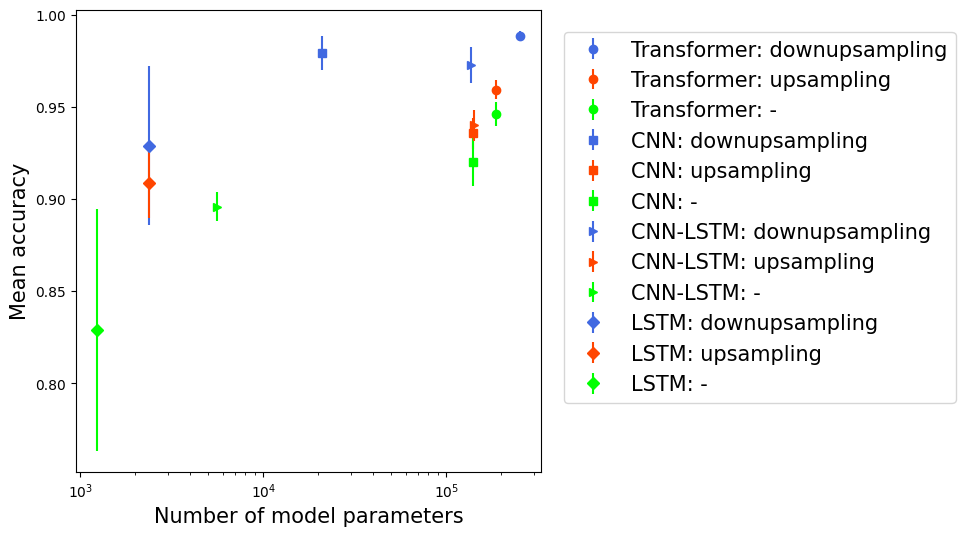

In [8]:
typemean = 'mean_accuracy'
typeerr = 'std_accuracy'

plt.figure(figsize=(6, 6))
#transformer
x, y, yerr = df_trans_doup.head(nplot)['total_params'].astype(float), df_trans_doup.head(nplot)[typemean].astype(float), df_trans_doup.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='o', linestyle='None', color="royalblue", label='Transformer: downupsampling')

x, y, yerr = df_trans_up.head(nplot)['total_params'].astype(float), df_trans_up.head(nplot)[typemean].astype(float), df_trans_up.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='o', linestyle='None', color="orangered", label='Transformer: upsampling')

x, y, yerr = df_trans.head(nplot)['total_params'].astype(float), df_trans.head(nplot)[typemean].astype(float), df_trans.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='o', linestyle='None', color="lime", label='Transformer: -')

#CNN
x, y, yerr = df_cnn_doup.head(nplot)['total_params'].astype(float), df_cnn_doup.head(nplot)[typemean].astype(float), df_cnn_doup.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='s', linestyle='None', color="royalblue", label='CNN: downupsampling')

x, y, yerr = df_cnn_up.head(nplot)['total_params'].astype(float), df_cnn_up.head(nplot)[typemean].astype(float), df_cnn_up.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='s', linestyle='None', color="orangered", label='CNN: upsampling')

x, y, yerr = df_cnn.head(nplot)['total_params'].astype(float), df_cnn.head(nplot)[typemean].astype(float), df_cnn.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='s', linestyle='None', color="lime", label='CNN: -')

#CNN_LSTM
x, y, yerr = df_cnnlstm_doup.head(nplot)['total_params'].astype(float), df_cnnlstm_doup.head(nplot)[typemean].astype(float), df_cnnlstm_doup.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='>', linestyle='None', color="royalblue", label='CNN-LSTM: downupsampling')

x, y, yerr = df_cnnlstm_up.head(nplot)['total_params'].astype(float), df_cnnlstm_up.head(nplot)[typemean].astype(float), df_cnnlstm_up.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='>', linestyle='None', color="orangered", label='CNN-LSTM: upsampling')

x, y, yerr = df_cnnlstm.head(nplot)['total_params'].astype(float), df_cnnlstm.head(nplot)[typemean].astype(float), df_cnnlstm.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='>', linestyle='None', color="lime", label='CNN-LSTM: -')


#LSTM
x, y, yerr = df_lstm_doup.head(nplot)['total_params'].astype(float), df_lstm_doup.head(nplot)[typemean].astype(float), df_lstm_doup.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='D', linestyle='None', color="royalblue", label='LSTM: downupsampling')

x, y, yerr = df_lstm_up.head(nplot)['total_params'].astype(float), df_lstm_up.head(nplot)[typemean].astype(float), df_lstm_up.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='D', linestyle='None', color="orangered", label='LSTM: upsampling')

x, y, yerr = df_lstm.head(nplot)['total_params'].astype(float), df_lstm.head(nplot)[typemean].astype(float), df_lstm.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='D', linestyle='None', color="lime", label='LSTM: -')


plt.xlabel('Number of model parameters', fontdict={'fontsize': 15})
plt.ylabel('Mean accuracy', fontsize=15)
plt.xscale('log')
plt.legend(loc=(1.05, 0.15), fontsize=15)
plt.savefig('./Figs/results_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()


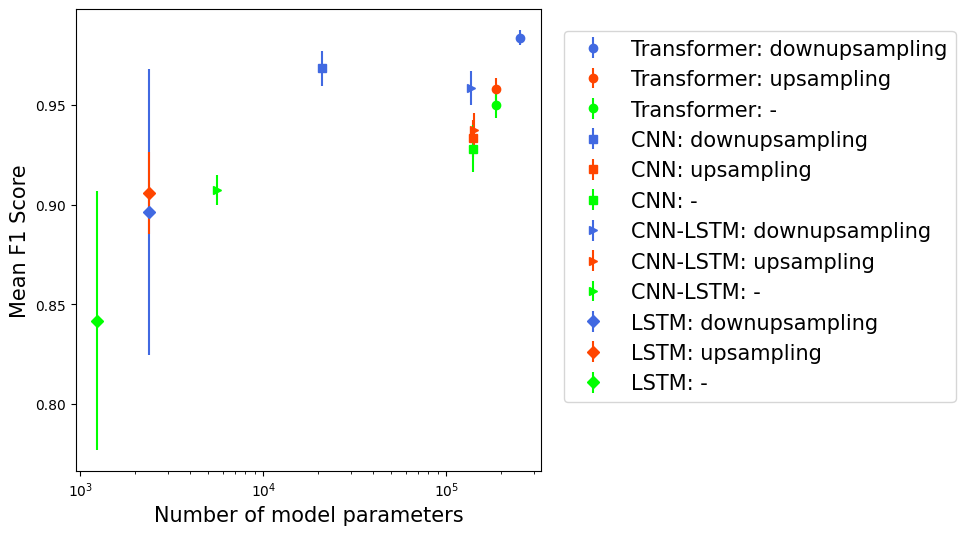

In [9]:
typemean = 'mean_f1_score'
typeerr = 'std_f1_score'

plt.figure(figsize=(6, 6))
#transformer
x, y, yerr = df_trans_doup.head(nplot)['total_params'].astype(float), df_trans_doup.head(nplot)[typemean].astype(float), df_trans_doup.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='o', linestyle='None', color="royalblue", label='Transformer: downupsampling')

x, y, yerr = df_trans_up.head(nplot)['total_params'].astype(float), df_trans_up.head(nplot)[typemean].astype(float), df_trans_up.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='o', linestyle='None', color="orangered", label='Transformer: upsampling')

x, y, yerr = df_trans.head(nplot)['total_params'].astype(float), df_trans.head(nplot)[typemean].astype(float), df_trans.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='o', linestyle='None', color="lime", label='Transformer: -')

#CNN
x, y, yerr = df_cnn_doup.head(nplot)['total_params'].astype(float), df_cnn_doup.head(nplot)[typemean].astype(float), df_cnn_doup.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='s', linestyle='None', color="royalblue", label='CNN: downupsampling')

x, y, yerr = df_cnn_up.head(nplot)['total_params'].astype(float), df_cnn_up.head(nplot)[typemean].astype(float), df_cnn_up.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='s', linestyle='None', color="orangered", label='CNN: upsampling')

x, y, yerr = df_cnn.head(nplot)['total_params'].astype(float), df_cnn.head(nplot)[typemean].astype(float), df_cnn.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='s', linestyle='None', color="lime", label='CNN: -')

#CNN_LSTM
x, y, yerr = df_cnnlstm_doup.head(nplot)['total_params'].astype(float), df_cnnlstm_doup.head(nplot)[typemean].astype(float), df_cnnlstm_doup.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='>', linestyle='None', color="royalblue", label='CNN-LSTM: downupsampling')

x, y, yerr = df_cnnlstm_up.head(nplot)['total_params'].astype(float), df_cnnlstm_up.head(nplot)[typemean].astype(float), df_cnnlstm_up.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='>', linestyle='None', color="orangered", label='CNN-LSTM: upsampling')

x, y, yerr = df_cnnlstm.head(nplot)['total_params'].astype(float), df_cnnlstm.head(nplot)[typemean].astype(float), df_cnnlstm.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='>', linestyle='None', color="lime", label='CNN-LSTM: -')


#LSTM
x, y, yerr = df_lstm_doup.head(nplot)['total_params'].astype(float), df_lstm_doup.head(nplot)[typemean].astype(float), df_lstm_doup.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='D', linestyle='None', color="royalblue", label='LSTM: downupsampling')

x, y, yerr = df_lstm_up.head(nplot)['total_params'].astype(float), df_lstm_up.head(nplot)[typemean].astype(float), df_lstm_up.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='D', linestyle='None', color="orangered", label='LSTM: upsampling')

x, y, yerr = df_lstm.head(nplot)['total_params'].astype(float), df_lstm.head(nplot)[typemean].astype(float), df_lstm.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='D', linestyle='None', color="lime", label='LSTM: -')


plt.xlabel('Number of model parameters', fontdict={'fontsize': 15})
plt.ylabel('Mean F1 Score', fontsize=15)
plt.xscale('log')
plt.legend(loc=(1.05, 0.15), fontsize=15)
plt.savefig('./Figs/results_f1score.png', dpi=300, bbox_inches='tight')
plt.show()


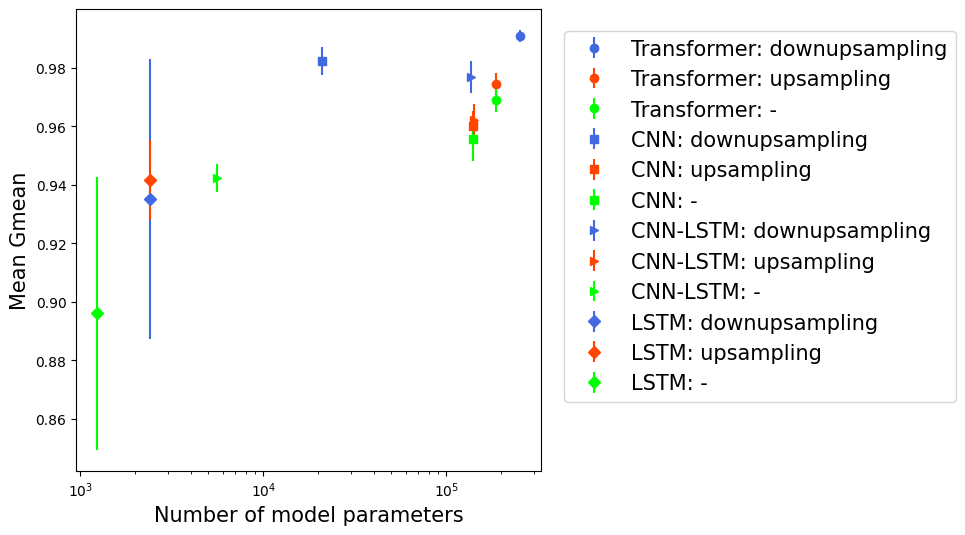

In [10]:
typemean = 'mean_gmean'
typeerr = 'std_gmean'

plt.figure(figsize=(6, 6))
#transformer
x, y, yerr = df_trans_doup.head(nplot)['total_params'].astype(float), df_trans_doup.head(nplot)[typemean].astype(float), df_trans_doup.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='o', linestyle='None', color="royalblue", label='Transformer: downupsampling')

x, y, yerr = df_trans_up.head(nplot)['total_params'].astype(float), df_trans_up.head(nplot)[typemean].astype(float), df_trans_up.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='o', linestyle='None', color="orangered", label='Transformer: upsampling')

x, y, yerr = df_trans.head(nplot)['total_params'].astype(float), df_trans.head(nplot)[typemean].astype(float), df_trans.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='o', linestyle='None', color="lime", label='Transformer: -')

#CNN
x, y, yerr = df_cnn_doup.head(nplot)['total_params'].astype(float), df_cnn_doup.head(nplot)[typemean].astype(float), df_cnn_doup.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='s', linestyle='None', color="royalblue", label='CNN: downupsampling')

x, y, yerr = df_cnn_up.head(nplot)['total_params'].astype(float), df_cnn_up.head(nplot)[typemean].astype(float), df_cnn_up.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='s', linestyle='None', color="orangered", label='CNN: upsampling')

x, y, yerr = df_cnn.head(nplot)['total_params'].astype(float), df_cnn.head(nplot)[typemean].astype(float), df_cnn.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='s', linestyle='None', color="lime", label='CNN: -')

#CNN_LSTM
x, y, yerr = df_cnnlstm_doup.head(nplot)['total_params'].astype(float), df_cnnlstm_doup.head(nplot)[typemean].astype(float), df_cnnlstm_doup.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='>', linestyle='None', color="royalblue", label='CNN-LSTM: downupsampling')

x, y, yerr = df_cnnlstm_up.head(nplot)['total_params'].astype(float), df_cnnlstm_up.head(nplot)[typemean].astype(float), df_cnnlstm_up.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='>', linestyle='None', color="orangered", label='CNN-LSTM: upsampling')

x, y, yerr = df_cnnlstm.head(nplot)['total_params'].astype(float), df_cnnlstm.head(nplot)[typemean].astype(float), df_cnnlstm.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='>', linestyle='None', color="lime", label='CNN-LSTM: -')


#LSTM
x, y, yerr = df_lstm_doup.head(nplot)['total_params'].astype(float), df_lstm_doup.head(nplot)[typemean].astype(float), df_lstm_doup.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='D', linestyle='None', color="royalblue", label='LSTM: downupsampling')

x, y, yerr = df_lstm_up.head(nplot)['total_params'].astype(float), df_lstm_up.head(nplot)[typemean].astype(float), df_lstm_up.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='D', linestyle='None', color="orangered", label='LSTM: upsampling')

x, y, yerr = df_lstm.head(nplot)['total_params'].astype(float), df_lstm.head(nplot)[typemean].astype(float), df_lstm.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='D', linestyle='None', color="lime", label='LSTM: -')


plt.xlabel('Number of model parameters', fontdict={'fontsize': 15})
plt.ylabel('Mean Gmean', fontsize=15)
plt.xscale('log')
plt.legend(loc=(1.05, 0.15), fontsize=15)
plt.savefig('./Figs/results_gmean.png', dpi=300, bbox_inches='tight')
plt.show()


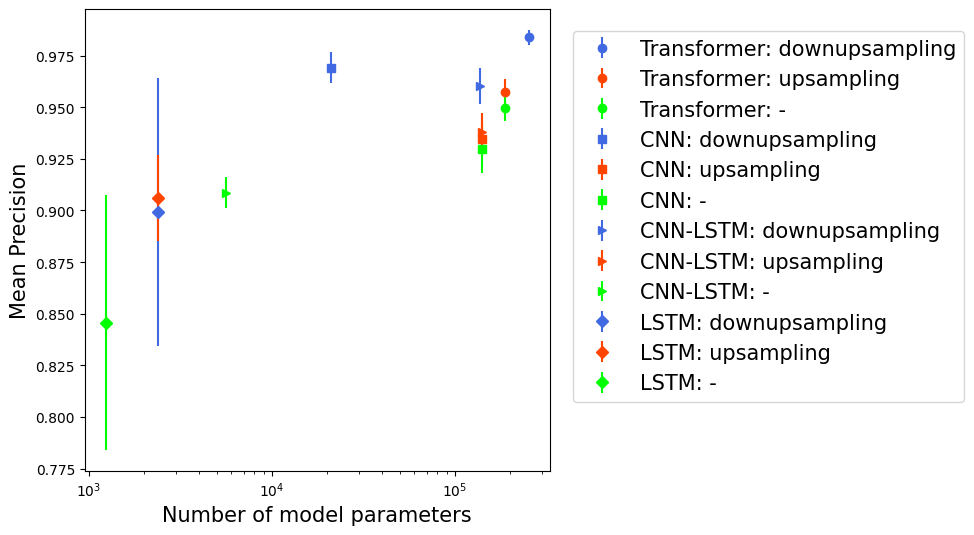

In [11]:
typemean = 'mean_precision'
typeerr = 'std_precision'

plt.figure(figsize=(6, 6))
#transformer
x, y, yerr = df_trans_doup.head(nplot)['total_params'].astype(float), df_trans_doup.head(nplot)[typemean].astype(float), df_trans_doup.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='o', linestyle='None', color="royalblue", label='Transformer: downupsampling')

x, y, yerr = df_trans_up.head(nplot)['total_params'].astype(float), df_trans_up.head(nplot)[typemean].astype(float), df_trans_up.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='o', linestyle='None', color="orangered", label='Transformer: upsampling')

x, y, yerr = df_trans.head(nplot)['total_params'].astype(float), df_trans.head(nplot)[typemean].astype(float), df_trans.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='o', linestyle='None', color="lime", label='Transformer: -')

#CNN
x, y, yerr = df_cnn_doup.head(nplot)['total_params'].astype(float), df_cnn_doup.head(nplot)[typemean].astype(float), df_cnn_doup.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='s', linestyle='None', color="royalblue", label='CNN: downupsampling')

x, y, yerr = df_cnn_up.head(nplot)['total_params'].astype(float), df_cnn_up.head(nplot)[typemean].astype(float), df_cnn_up.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='s', linestyle='None', color="orangered", label='CNN: upsampling')

x, y, yerr = df_cnn.head(nplot)['total_params'].astype(float), df_cnn.head(nplot)[typemean].astype(float), df_cnn.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='s', linestyle='None', color="lime", label='CNN: -')

#CNN_LSTM
x, y, yerr = df_cnnlstm_doup.head(nplot)['total_params'].astype(float), df_cnnlstm_doup.head(nplot)[typemean].astype(float), df_cnnlstm_doup.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='>', linestyle='None', color="royalblue", label='CNN-LSTM: downupsampling')

x, y, yerr = df_cnnlstm_up.head(nplot)['total_params'].astype(float), df_cnnlstm_up.head(nplot)[typemean].astype(float), df_cnnlstm_up.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='>', linestyle='None', color="orangered", label='CNN-LSTM: upsampling')

x, y, yerr = df_cnnlstm.head(nplot)['total_params'].astype(float), df_cnnlstm.head(nplot)[typemean].astype(float), df_cnnlstm.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='>', linestyle='None', color="lime", label='CNN-LSTM: -')


#LSTM
x, y, yerr = df_lstm_doup.head(nplot)['total_params'].astype(float), df_lstm_doup.head(nplot)[typemean].astype(float), df_lstm_doup.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='D', linestyle='None', color="royalblue", label='LSTM: downupsampling')

x, y, yerr = df_lstm_up.head(nplot)['total_params'].astype(float), df_lstm_up.head(nplot)[typemean].astype(float), df_lstm_up.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='D', linestyle='None', color="orangered", label='LSTM: upsampling')

x, y, yerr = df_lstm.head(nplot)['total_params'].astype(float), df_lstm.head(nplot)[typemean].astype(float), df_lstm.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='D', linestyle='None', color="lime", label='LSTM: -')


plt.xlabel('Number of model parameters', fontdict={'fontsize': 15})
plt.ylabel('Mean Precision', fontsize=15)
plt.xscale('log')
plt.legend(loc=(1.05, 0.15), fontsize=15)
plt.savefig('./Figs/results_precision.png', dpi=300, bbox_inches='tight')
plt.show()


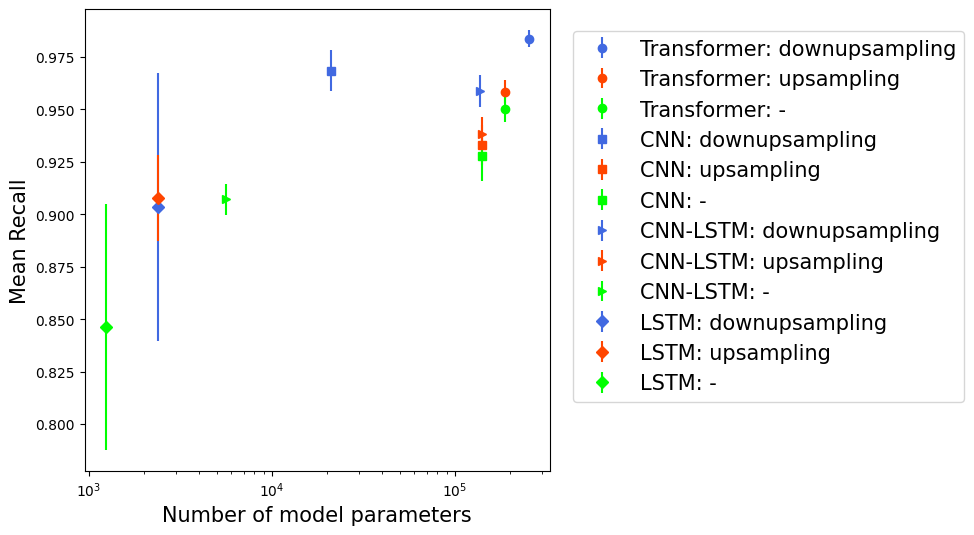

In [12]:
typemean = 'mean_recall'
typeerr = 'std_recall'

plt.figure(figsize=(6, 6))
#transformer
x, y, yerr = df_trans_doup.head(nplot)['total_params'].astype(float), df_trans_doup.head(nplot)[typemean].astype(float), df_trans_doup.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='o', linestyle='None', color="royalblue", label='Transformer: downupsampling')

x, y, yerr = df_trans_up.head(nplot)['total_params'].astype(float), df_trans_up.head(nplot)[typemean].astype(float), df_trans_up.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='o', linestyle='None', color="orangered", label='Transformer: upsampling')

x, y, yerr = df_trans.head(nplot)['total_params'].astype(float), df_trans.head(nplot)[typemean].astype(float), df_trans.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='o', linestyle='None', color="lime", label='Transformer: -')

#CNN
x, y, yerr = df_cnn_doup.head(nplot)['total_params'].astype(float), df_cnn_doup.head(nplot)[typemean].astype(float), df_cnn_doup.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='s', linestyle='None', color="royalblue", label='CNN: downupsampling')

x, y, yerr = df_cnn_up.head(nplot)['total_params'].astype(float), df_cnn_up.head(nplot)[typemean].astype(float), df_cnn_up.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='s', linestyle='None', color="orangered", label='CNN: upsampling')

x, y, yerr = df_cnn.head(nplot)['total_params'].astype(float), df_cnn.head(nplot)[typemean].astype(float), df_cnn.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='s', linestyle='None', color="lime", label='CNN: -')

#CNN_LSTM
x, y, yerr = df_cnnlstm_doup.head(nplot)['total_params'].astype(float), df_cnnlstm_doup.head(nplot)[typemean].astype(float), df_cnnlstm_doup.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='>', linestyle='None', color="royalblue", label='CNN-LSTM: downupsampling')

x, y, yerr = df_cnnlstm_up.head(nplot)['total_params'].astype(float), df_cnnlstm_up.head(nplot)[typemean].astype(float), df_cnnlstm_up.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='>', linestyle='None', color="orangered", label='CNN-LSTM: upsampling')

x, y, yerr = df_cnnlstm.head(nplot)['total_params'].astype(float), df_cnnlstm.head(nplot)[typemean].astype(float), df_cnnlstm.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='>', linestyle='None', color="lime", label='CNN-LSTM: -')


#LSTM
x, y, yerr = df_lstm_doup.head(nplot)['total_params'].astype(float), df_lstm_doup.head(nplot)[typemean].astype(float), df_lstm_doup.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='D', linestyle='None', color="royalblue", label='LSTM: downupsampling')

x, y, yerr = df_lstm_up.head(nplot)['total_params'].astype(float), df_lstm_up.head(nplot)[typemean].astype(float), df_lstm_up.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='D', linestyle='None', color="orangered", label='LSTM: upsampling')

x, y, yerr = df_lstm.head(nplot)['total_params'].astype(float), df_lstm.head(nplot)[typemean].astype(float), df_lstm.head(nplot)[typeerr].astype(float)
plt.errorbar(x, y, yerr, marker='D', linestyle='None', color="lime", label='LSTM: -')


plt.xlabel('Number of model parameters', fontdict={'fontsize': 15})
plt.ylabel('Mean Recall', fontsize=15)
plt.xscale('log')
plt.legend(loc=(1.05, 0.15), fontsize=15)
plt.savefig('./Figs/results_recall.png', dpi=300, bbox_inches='tight')
plt.show()
